In [2]:
import pandas as pd
import globals
from pathlib import Path

def filter_kidnapping_articles():
    # 读取新闻文章CSV文件
    news_file = Path(globals.DATA_PATH) / "news_articles.csv"
    df = pd.read_csv(news_file, delimiter='|', quotechar='~')
    
    # 定义与绑架相关的关键词
    kidnapping_keywords = [
        'kidnap', 'abduct', 'hostage', 'ransom', 'missing person',
        'disappear', 'captive', 'kidnapped', 'abducted', 'kidnapping',
        'abduction', 'disappeared', 'missing'
    ]
    
    # 创建一个搜索模式
    pattern = '|'.join(kidnapping_keywords)
    
    # 在标题和内容中搜索这些关键词
    mask = (
        df['title'].str.contains(pattern, case=False, na=False) |
        df['content'].str.contains(pattern, case=False, na=False)
    )
    
    # 筛选相关文章
    kidnapping_articles = df[mask].copy()
    
    # 按发布日期排序
    kidnapping_articles['publish_date'] = pd.to_datetime(kidnapping_articles['publish_date'])
    kidnapping_articles = kidnapping_articles.sort_values('publish_date')
    
    # 显示结果
    print(f"\n找到 {len(kidnapping_articles)} 篇与绑架相关的文章：\n")
    for _, article in kidnapping_articles.iterrows():
        print(f"日期: {article['publish_date']}")
        print(f"标题: {article['title']}")
        print(f"来源: {article['source']}")
        print(f"作者: {article['author']}")
        print(f"位置: {article['location']}")
        print("内容预览: " + article['content'][:200] + "...")
        print("-" * 80 + "\n")



In [3]:
news_file = Path(globals.DATA_PATH) / "news_articles.csv"
df = pd.read_csv(news_file, delimiter='|', quotechar='~')
df.head()

,articleID,source,title,author,publish_date,location,content
0,121,All News Today,POK PROTESTS END IN ARRESTS,NaN,2005-04-06,"ELODIS, Kronos",Fifteen members of the Protectors of Kronos (P...
1,135,All News Today,RALLY SCHEDULED IN SUPPORT OF INCREASED GOVERN...,NaN,2012-04-09,"ABILA, Kronos","Silvia Marek, leader of the Protectors of Kron..."
2,152,All News Today,LACK OF DETAILS MARS GOVERNMENT INTENTIONS,NaN,1993-02-02,"ABILA, Kronos",In a glitzy press conference late last year Pr...
3,154,All News Today,"ELODIS, KRONOS: A TOWN IN NEED, Part One",NaN,1998-03-20,NaN,"NOTE: This article is the first in a series, r..."
4,237,All News Today,"ELODIS, KRONOS: WILL THE GOVERNMENT RESPOND IN...",NaN,1998-05-15,NaN,NOTE: This article is the last installment of ...


In [4]:
resume_file = Path(globals.DATA_PATH) / "work_history.csv"
df = pd.read_csv(resume_file, delimiter=',')
df.head()


,name,organization_type,organization_name,start_date,end_date,description
0,AdanMorlun,GAStech,GASTech,NaN,Present,GASTech - Kronos\t\tTruck Driver\t\t \t\t\t200...
1,AlbinaHafon,GAStech,GASTech,NaN,Present,GASTech - Kronos\t\tTruck Driver\t\t \t\t\t200...
2,AndaRibera,GAStech,GASTech,Unknown,Unknown,"GASTech – Abila, Kronos"
3,AxelCalzas,GAStech,GASTech,Unknown,Unknown,GASTech - Kronos
4,BertrandOvan,GAStech,GASTech,NaN,Present,GASTech - Kronos\t\tFacilities Group Manager \...


In [5]:
df["name"].value_counts()

IreneNant         2
CorneliaLais      2
ElsaOrilla        2
HidekiCocinaro    2
IsandeBorrasca    1
StenigFusil       1
RachelPantanal    1
NilsCalixto       1
MarinOnda         1
LoretoBodrogi     1
LinneaBergen      1
LidelseDedos      1
LarsAzada         1
IsiaVann          1
AdanMorlun        1
IsakBaza          1
AlbinaHafon       1
FelixResumir      1
FelixBalas        1
EmileArpa         1
DanteCoginian     1
ClaudioHawelon    1
BertrandOvan      1
AxelCalzas        1
AndaRibera        1
SvenFlecha        1
Name: name, dtype: int64

In [6]:
df[df["organization_type"] == "Government"]

,name,organization_type,organization_name,start_date,end_date,description
26,CorneliaLais,Government,Military,Unknown,Unknown,Military Service
27,ElsaOrilla,Government,issues with appropriate government,Unknown,Unknown,Coordinate location damage issues with appropr...
28,HidekiCocinaro,Government,with the various government,Unknown,Unknown,Interface with the various government entities...
29,IreneNant,Government,with company and government,Unknown,Unknown,Prepared accident reports in compliance with c...


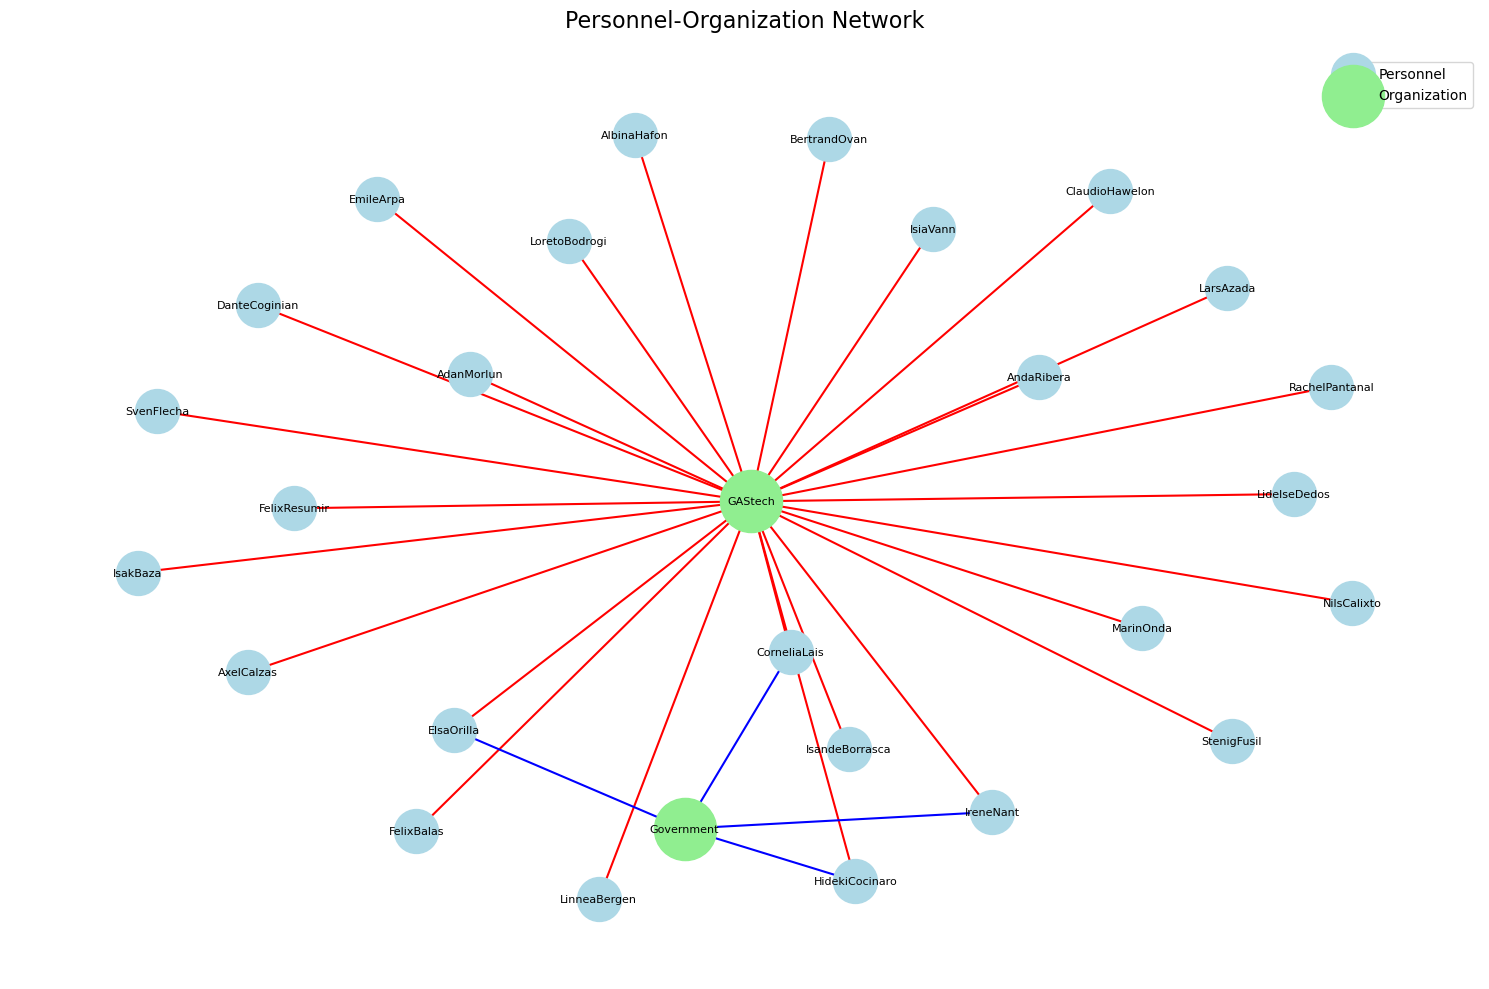

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
for _, row in df.iterrows():
    G.add_node(row["name"], type="person")
    G.add_node(row["organization_type"], type="organization")
    G.add_edge(row["name"], row["organization_type"], org_type=row["organization_type"])

# Create network graph using matplotlib
plt.figure(figsize=(15, 10))

# Set node positions 
pos = nx.spring_layout(G, k=1, iterations=50)

# Draw different types of nodes
person_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'person']
org_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'organization']

# Draw nodes
nx.draw_networkx_nodes(G, pos, nodelist=person_nodes, node_color='lightblue',
                      node_size=1000, label='Personnel')
nx.draw_networkx_nodes(G, pos, nodelist=org_nodes, node_color='lightgreen',
                      node_size=2000, label='Organization')

# Set edge colors based on organization type
edge_colors = []
for (u, v, d) in G.edges(data=True):
    if d['org_type'] == 'GAStech':
        edge_colors.append('red')
    elif d['org_type'] == 'Government':
        edge_colors.append('blue')
    else:
        edge_colors.append('gray')

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1.5)

# Add labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Add legend
plt.legend()

# Set title
plt.title('Personnel-Organization Network', fontsize=16, pad=20)

# Display graph
plt.axis('off')
plt.tight_layout()
plt.show()


In [8]:
resume_file = Path(globals.DATA_PATH) / "email headers.csv"
df_emial = pd.read_csv(resume_file, encoding='latin1')
df_emial.head()


,From,To,Date,Subject
0,Varja.Lagos@gastech.com.kronos,"Varja.Lagos@gastech.com.kronos, Hennie.Osvaldo...",1/6/2014 10:28,Patrol schedule changes
1,Brand.Tempestad@gastech.com.kronos,"Birgitta.Frente@gastech.com.kronos, Lars.Azada...",1/6/2014 10:35,Wellhead flow rate data
2,Isak.Baza@gastech.com.kronos,"Isak.Baza@gastech.com.kronos, Lucas.Alcazar@ga...",1/6/2014 10:43,RE: GT-SeismicProcessorPro Bug Report
3,Lucas.Alcazar@gastech.com.kronos,"Isak.Baza@gastech.com.kronos, Lucas.Alcazar@ga...",1/6/2014 10:50,RE: GT-SeismicProcessorPro Bug Report
4,Linnea.Bergen@gastech.com.kronos,"Rachel.Pantanal@gastech.com.kronos, Lars.Azada...",1/6/2014 11:00,RE: Upcoming birthdays


In [52]:
import pandas as pd


resume_file = Path(globals.DATA_PATH) / "email headers.csv"
df_email = pd.read_csv(resume_file, encoding='latin1')

# column consistent
df_email = df_email[["From", "To", "Date", "Subject"]].dropna()
df_email.columns = ["sender", "recipients", "date", "subject"]

# split the same recipients to multiple lines
df_email["recipients"] = df_email["recipients"].str.split(",")
df_email = df_email.explode("recipients")

# clean data
df_email["sender"] = df_email["sender"].str.strip().str.lower()
df_email["recipients"] = df_email["recipients"].str.strip().str.lower()
df_email["sender"] = df_email["sender"].str.split("@").str[0]
df_email["recipients"] = df_email["recipients"].str.split("@").str[0]
df_email["subject"] = df_email["subject"].fillna("").str.lower()

# time type 
df_email["date"] = pd.to_datetime(df_email["date"], errors='coerce')

df_email.head()


,sender,recipients,date,subject
0,varja.lagos,varja.lagos,2014-01-06 10:28:00,patrol schedule changes
0,varja.lagos,hennie.osvaldo,2014-01-06 10:28:00,patrol schedule changes
0,varja.lagos,loreto.bodrogi,2014-01-06 10:28:00,patrol schedule changes
0,varja.lagos,inga.ferro,2014-01-06 10:28:00,patrol schedule changes
1,brand.tempestad,birgitta.frente,2014-01-06 10:35:00,wellhead flow rate data


In [53]:
df_email.shape

(8990, 4)

In [54]:
df_email["subject"].unique().shape

(303,)

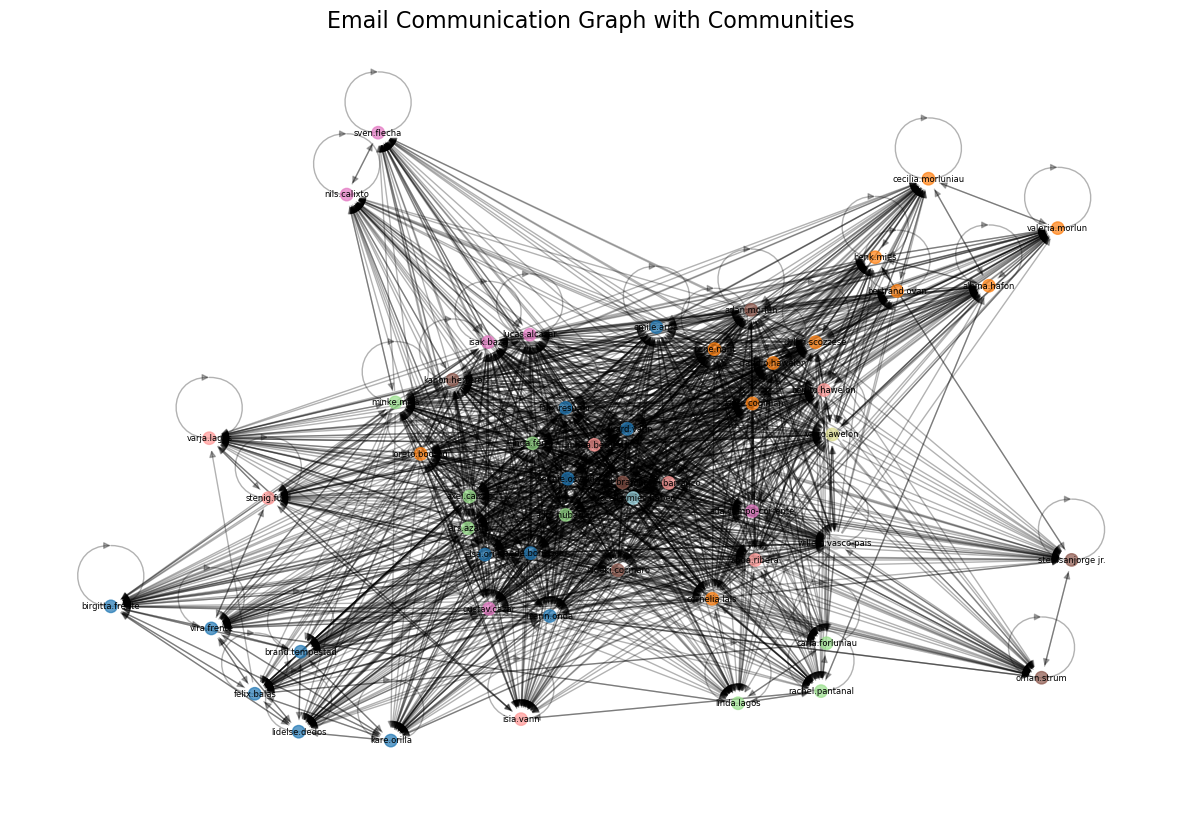

In [56]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# 构建有向图
G = nx.DiGraph()
for row in df_email.itertuples():
    sender = row.sender
    recipient = row.recipients
    if sender and recipient:
        if G.has_edge(sender, recipient):
            G[sender][recipient]['weight'] += 1
        else:
            G.add_edge(sender, recipient, weight=1)

# PageRank 计算核心人物
pagerank_scores = nx.pagerank(G)
top_10 = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]

# 社区检测
from networkx.algorithms.community import greedy_modularity_communities
communities = list(greedy_modularity_communities(G.to_undirected()))

# 分配社区颜色
community_map = {}
for i, community in enumerate(communities):
    for name in community:
        community_map[name] = i

colors = [community_map.get(node, 0) for node in G.nodes()]

# 绘制图形
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.tab20, node_size=80, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=6)
plt.title("Email Communication Graph with Communities", fontsize=16)
plt.axis('off')
plt.show()


top_10_df = pd.DataFrame(top_10, columns=["Person", "PageRank_Score"])


In [29]:
top_10_df

,Person,PageRank_Score
0,henk.mies@gastech.com.kronos,0.032607
1,albina.hafon@gastech.com.kronos,0.027820
2,claudio.hawelon@gastech.com.kronos,0.027147
3,dylan.scozzese@gastech.com.kronos,0.026529
4,adan.morlun@gastech.com.kronos,0.025112
5,sven.flecha@gastech.com.kronos,0.024721
6,irene.nant@gastech.com.kronos,0.024628
7,nils.calixto@gastech.com.kronos,0.024262
8,valeria.morlun@gastech.com.kronos,0.024037
9,isak.baza@gastech.com.kronos,0.023275


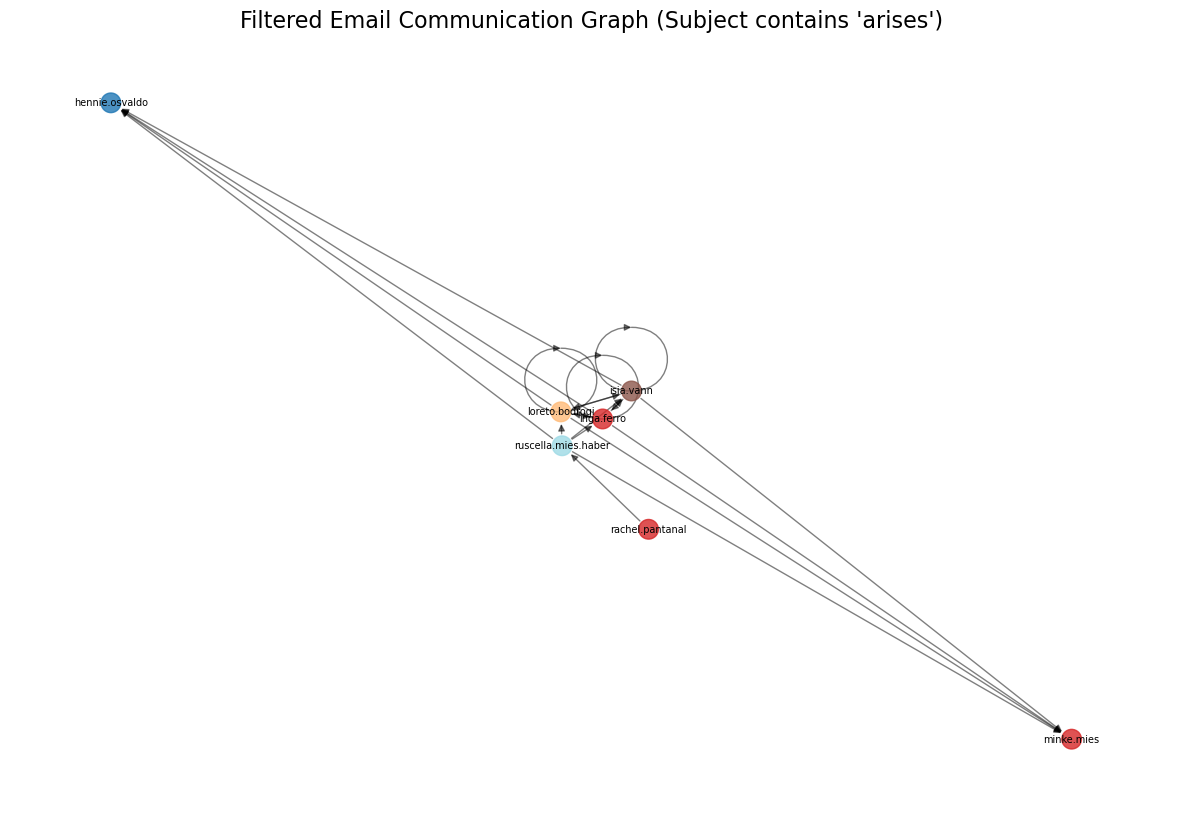

In [72]:
from networkx.algorithms.community import greedy_modularity_communities
communities = list(greedy_modularity_communities(G.to_undirected()))
community_map = {}
for i, community in enumerate(communities):
    for name in community:
        community_map[name] = i

# 对原图进行关键词filter
keywords = ['arise']
filtered_df = df_email[df_email["subject"].str.contains('|'.join(keywords), case=False)]

# 构建关键词相关子图
G_sub = nx.DiGraph()
for row in filtered_df.itertuples():
    sender = row.sender
    recipient = row.recipients
    if sender and recipient:
        if G_sub.has_edge(sender, recipient):
            G_sub[sender][recipient]['weight'] += 1
        else:
            G_sub.add_edge(sender, recipient, weight=1)

# 保留原community颜色
colors = [community_map.get(node, 0) for node in G_sub.nodes()]

# 绘制过滤后的子图
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G_sub, k=0.5, seed=42)
nx.draw_networkx_nodes(G_sub, pos, node_color=colors, cmap=plt.cm.tab20, node_size=200, alpha=0.8)
nx.draw_networkx_edges(G_sub, pos, alpha=0.5)
nx.draw_networkx_labels(G_sub, pos, font_size=7)
plt.title("Filtered Email Communication Graph (Subject contains 'arises')", fontsize=16)
plt.axis('off')
plt.show()

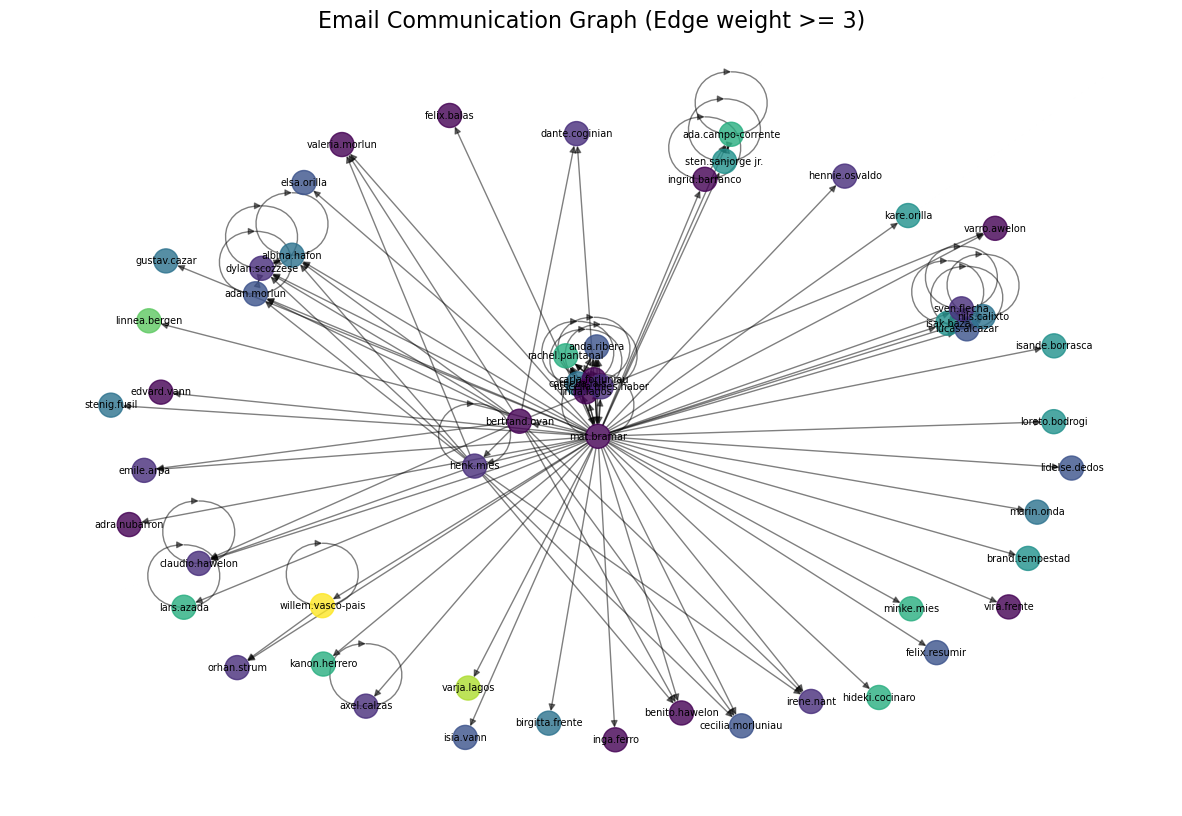

In [75]:

# 统计每对 sender-recipients 的邮件数量
edge_df = df_email.groupby(['sender', 'recipients']).size().reset_index(name='count')

# 构建图，并赋予 weight=邮件数量
G = nx.DiGraph()
for row in edge_df.itertuples():
    G.add_edge(row.sender, row.recipients, weight=row.count)

# 保留邮件数量 >= 3 的边
G_sub = nx.DiGraph([(u, v, d) for u, v, d in G.edges(data=True) if d['weight'] >= 15])
# 社区检测
from networkx.algorithms.community import greedy_modularity_communities
communities = list(greedy_modularity_communities(G.to_undirected()))

# 分配社区颜色
community_map = {}
for i, community in enumerate(communities):
    for name in community:
        community_map[name] = i

colors = [community_map.get(node, 0) for node in G.nodes()]
# 绘制图形
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G_sub, k=0.5, seed=42)
edge_weights = [d['weight'] for u, v, d in G_sub.edges(data=True)]

nx.draw_networkx_nodes(G_sub, pos, node_color=colors, node_size=300, alpha=0.8)
nx.draw_networkx_edges(G_sub, pos, width=1, alpha=0.5)
nx.draw_networkx_labels(G_sub, pos, font_size=7)

plt.title("Email Communication Graph (Edge weight >= 3)", fontsize=16)
plt.axis('off')
plt.show()


In [64]:
df_self_mail = df_email[df_email["sender"] == df_email["recipients"]]
keywords = ['flower', 'arise', 'freedom', 'gis']
df_suspicious = df_self_mail[df_self_mail["subject"].str.contains('|'.join(keywords), case=False)]
df_self_mail["sender"].value_counts().head(10)

lucas.alcazar          50
isak.baza              46
nils.calixto           43
sven.flecha            40
mat.bramar             37
henk.mies              27
ruscella.mies.haber    25
sten.sanjorge jr.      23
dylan.scozzese         22
cornelia.lais          21
Name: sender, dtype: int64

In [66]:
df_self_mail.shape

(805, 4)

In [67]:
df_suspicious.shape

(32, 4)

In [10]:
articles_df = pd.read_csv("../data/news_articles.csv", encoding="utf-8", sep="|", parse_dates=["publish_date"])
articles_df.set_index("articleID", inplace=True)
articles_df.sort_index(inplace=True)

sources = articles_df["source"].unique()
articles_df.head()

,source,title,author,publish_date,location,content
articleID,,,,,,
0,The Orb,BUMP OF PROTESTS IN ABILA IN RESPONSE TO THE C...,NaN,2012-09-08,"ABILA, Kronos",The thousands of people striped the roads Thur...
1,The Light of Truth,ENORMOUS IPO MAKES THE BILLIONAIRE OF SANJORGE,NaN,2013-12-18,"CENTRUM, Tethys",The president and CEO of GAStech international...
2,Everyday News,Global boxes of the charity of dren of the dis...,NaN,1999-11-16,NaN,The new pleas campaign in the horizon to maint...
3,The Tulip,PROMINENT Citizen dies at 65,NaN,1994-02-18,"CENTRUM, Tethys",Friday early after four years of diminishing h...
4,News Online Today,"ELODIS, KRONOS: HELP FROM AN UNEXPECTED SOURC...",NaN,1998-04-26,NaN,"NOTE: This article is the second in a series, ..."


In [12]:

# 2. 加载 spaCy 模型
nlp = spacy.load("en_core_web_sm")

# 3. 白名单 ORG + 正确标签重写
CORRECT_LABELS = {
    "kronos": "ORG",
    "gastech": "ORG",
    "pok": "ORG",
    "apa": "ORG",
    "anti-pollution alliance": "ORG",
    "protectors of kronos": "ORG",
    "kronos government": "ORG"
}

def correct_label(ent):
    text = ent.text.strip()
    text_lower = text.lower()
    if text_lower in CORRECT_LABELS:
        return {"text": text, "label": CORRECT_LABELS[text_lower]}
    elif ent.label_ == "PERSON":
        return {"text": text, "label": "PERSON"}
    else:
        return None  # 忽略其他类型和非白名单 ORG

# 4. 提取实体 + 去重 + 修正标签
article_entities = []

for idx, row in articles_df.iterrows():
    content = row["content"]
    doc = nlp(content)

    ents = []
    seen = set()
    for ent in doc.ents:
        ent_info = correct_label(ent)
        if ent_info:
            key = (ent_info["text"], ent_info["label"])
            if key not in seen:
                ents.append(ent_info)
                seen.add(key)

    article_entities.append({
        "articleID": idx,
        "entities": ents
    })

# 5. 保存 JSON 文件
with open("article_entities_corrected.json", "w", encoding="utf-8") as f:
    json.dump(article_entities, f, indent=2)

In [83]:
entities_df = pd.DataFrame(article_entities)
entities_df.to_json("article_entities.json", orient="records", indent=2)

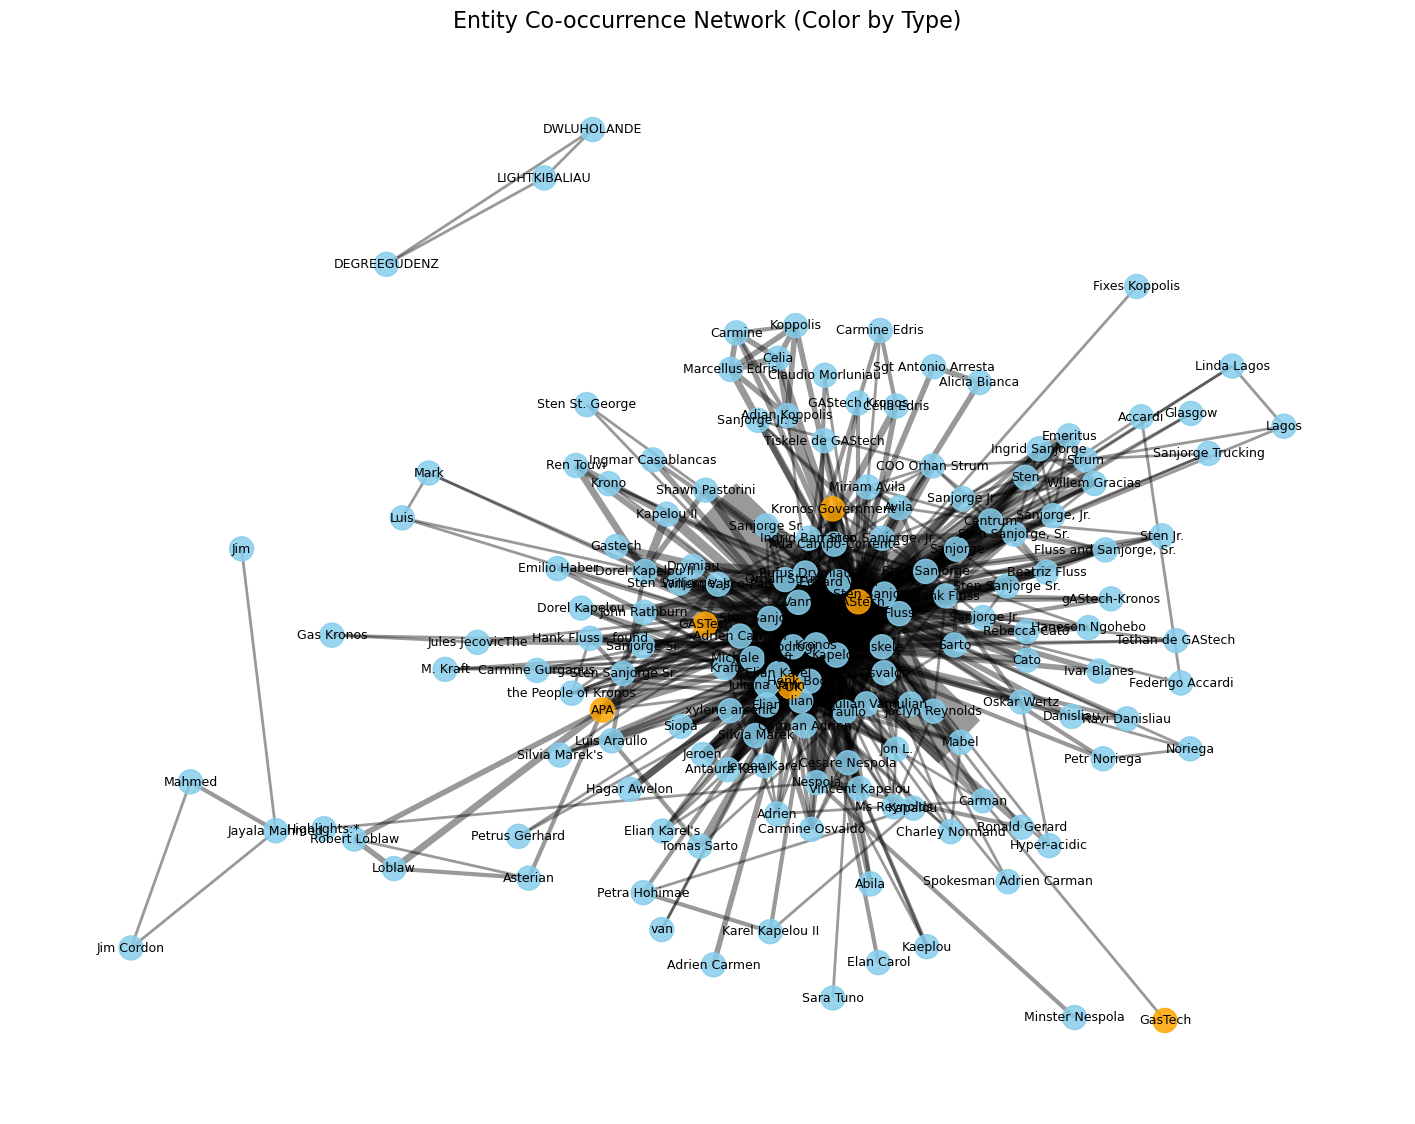

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# 加载实体 JSON（包含实体和标签）
with open('../data/article_entities.json', 'r', encoding='utf-8') as f:
    entity_data = json.load(f)

# 处理成共现关系并记录实体类型
cooccurrence = defaultdict(lambda: defaultdict(int))
entity_labels = {}  # 用于记录实体类型

for article in entity_data:
    entities = article["entities"]
    entity_texts = [e["text"].strip() for e in entities]
    entity_types = {e["text"].strip(): e["label"] for e in entities}

    unique_entities = list(set(entity_texts))
    for i in range(len(unique_entities)):
        for j in range(i + 1, len(unique_entities)):
            ent1 = unique_entities[i]
            ent2 = unique_entities[j]
            cooccurrence[ent1][ent2] += 1
            cooccurrence[ent2][ent1] += 1

    # 记录所有实体的类型（以最后一次为准）
    entity_labels.update(entity_types)

# 构建 NetworkX 图（共现次数 >= 5）
G = nx.Graph()
ORG_WHITELIST = {
    "gastech",
    "pok", "protectors of kronos",
    "apa", "anti-pollution alliance",
    "kronos", "kronos government"
    }

def is_whitelisted_org(ent):
    return ent.lower() in ORG_WHITELIST

G = nx.Graph()
for ent1, neighbors in cooccurrence.items():
    ent1_is_org = entity_labels.get(ent1) == "ORG"
    for ent2, weight in neighbors.items():
        ent2_is_org = entity_labels.get(ent2) == "ORG"

        # 如果 ent1 或 ent2 是 ORG，必须在白名单内
        if ent1_is_org and not is_whitelisted_org(ent1):
            continue
        if ent2_is_org and not is_whitelisted_org(ent2):
            continue

        if weight >= 2:
            G.add_edge(ent1, ent2, weight=weight)

# 分颜色绘制节点（根据 label）
color_map = []
for node in G.nodes():
    if entity_labels.get(node) == "PERSON":
        color_map.append("skyblue")
    elif entity_labels.get(node) == "ORG":
        color_map.append("orange")
    else:
        color_map.append("gray")

# 绘图
plt.figure(figsize=(18, 14))
pos = nx.spring_layout(G, k=0.5, seed=42)
weights = [d['weight'] for (_, _, d) in G.edges(data=True)]

nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=300, alpha=0.85)
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=9)

plt.title("Entity Co-occurrence Network (Color by Type)", fontsize=16)
plt.axis("off")
plt.show()


In [2]:
# 找出图中所有白名单 ORG 节点
whitelisted_orgs = [node for node in G.nodes if entity_labels.get(node) == "ORG"]

# 构建最终保留的节点集合：ORG + 和ORG有边的PERSON
final_nodes = set(whitelisted_orgs)

for org in whitelisted_orgs:
    neighbors = G.neighbors(org)
    for neighbor in neighbors:
        if entity_labels.get(neighbor) == "PERSON":
            final_nodes.add(neighbor)

# 构建子图
G_filtered = G.subgraph(final_nodes).copy()


In [94]:
target_nodes = nx.ego_graph(G, "GAStech", radius=1).nodes()
G_sub = G.subgraph(target_nodes)


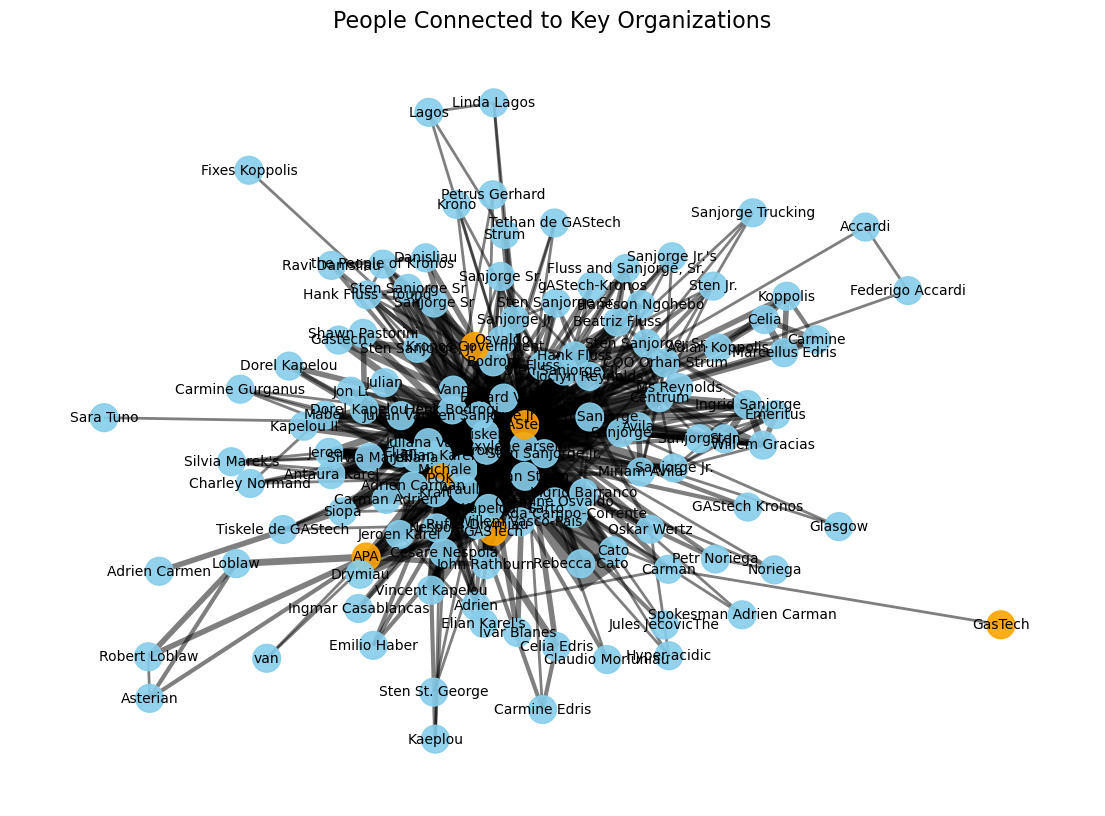

In [3]:
# 上色
color_map = []
for node in G_filtered.nodes():
    if entity_labels.get(node) == "PERSON":
        color_map.append("skyblue")
    elif entity_labels.get(node) == "ORG":
        color_map.append("orange")
    else:
        color_map.append("gray")

# 绘图
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G_filtered, k=0.5, seed=42)
weights = [d['weight'] for (_, _, d) in G_filtered.edges(data=True)]

nx.draw_networkx_nodes(G_filtered, pos, node_color=color_map, node_size=400, alpha=0.9)
nx.draw_networkx_edges(G_filtered, pos, width=weights, alpha=0.5)
nx.draw_networkx_labels(G_filtered, pos, font_size=10)

plt.title("People Connected to Key Organizations", fontsize=16)
plt.axis("off")
plt.show()


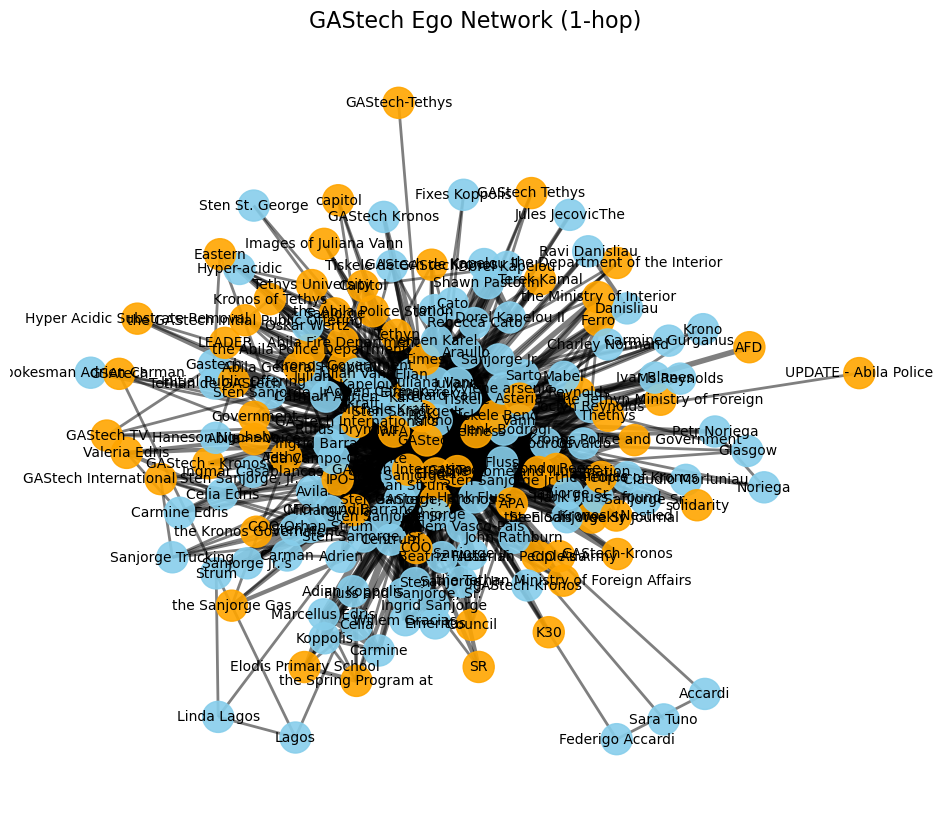

In [95]:

# 按类型上色
color_map_sub = []
for node in G_sub.nodes():
    if entity_labels.get(node) == "PERSON":
        color_map_sub.append("skyblue")
    elif entity_labels.get(node) == "ORG":
        color_map_sub.append("orange")
    else:
        color_map_sub.append("gray")

# 绘制子图
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_sub, k=0.5, seed=42)
weights = [d['weight'] for (_, _, d) in G_sub.edges(data=True)]

nx.draw_networkx_nodes(G_sub, pos, node_color=color_map_sub, node_size=500, alpha=0.9)
nx.draw_networkx_edges(G_sub, pos, width=weights, alpha=0.5)
nx.draw_networkx_labels(G_sub, pos, font_size=10)

plt.title("GAStech Ego Network (1-hop)", fontsize=16)
plt.axis("off")
plt.show()

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_single_article(article_data, article_id):
    for article in article_data:
        if article["articleID"] == article_id:
            entities = article["entities"]
            break
    else:
        print(f"Article {article_id} not found.")
        return

    G = nx.Graph()
    entity_labels = {}
    entity_names = [e["text"] for e in entities]
    entity_types = {e["text"]: e["label"] for e in entities}

    for i in range(len(entity_names)):
        for j in range(i + 1, len(entity_names)):
            G.add_edge(entity_names[i], entity_names[j])

    entity_labels.update(entity_types)

    # 上色
    color_map = []
    for node in G.nodes():
        if entity_labels.get(node) == "PERSON":
            color_map.append("skyblue")
        elif entity_labels.get(node) == "ORG":
            color_map.append("orange")
        else:
            color_map.append("gray")

    # 画图
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, k=0.7, seed=42)

    nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=500, alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=1, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10)

    plt.title(f"Entity Co-occurrence in Article {article_id}", fontsize=14)
    plt.axis("off")
    plt.show()


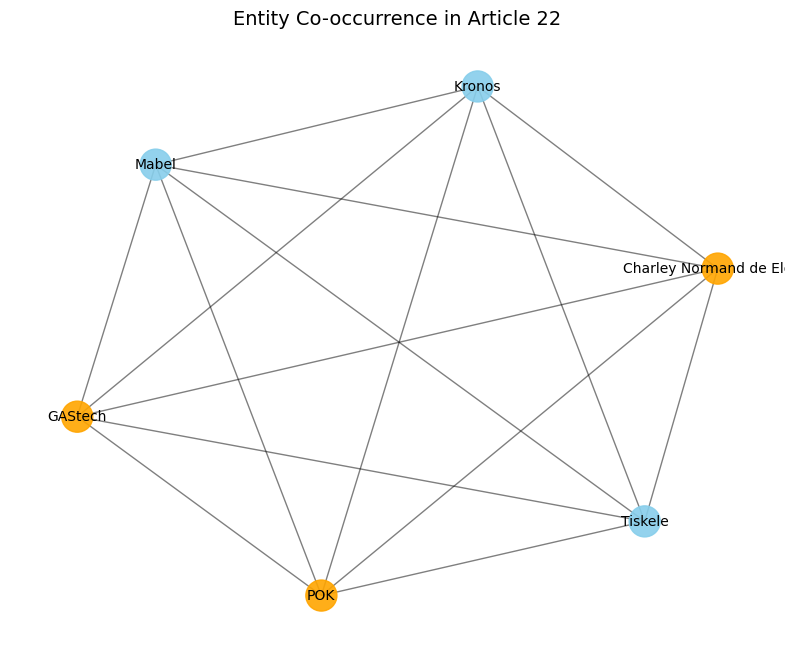

In [7]:
visualize_single_article(entity_data, article_id=22)
